In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

from statsmodels.formula.api import ols


%matplotlib inline


In [101]:
df = pd.read_csv('kc_house_data.csv')

In [102]:
len(df)

21597

In [103]:
# This is going to give us a table without extra information
to_drop = ['id', 'date', 'view', 'sqft_above', 
           'sqft_basement', 'yr_renovated', 
           'zipcode', 'lat', 'long', 
           'sqft_living15', 'sqft_lot15']
df.drop(to_drop, inplace=True, axis=1)

In [104]:
# Here is a more simplified version of the data
df_simple = df
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [105]:
# Here we are going to make a function to just use the number from grade
grade_number_only = [i[0:2].strip() for i in df_simple['grade']]

In [106]:
# Here we are adding 
df_simple['grade_number'] = grade_number_only
del df['grade']


In [107]:
df_simple

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,grade_number
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,1955,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,2004,8


In [108]:
# Here I am finding the outlier in number of bedrooms
a = df.loc[df_simple['bedrooms'] > 30]
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,grade_number
15856,640000.0,33,1.75,1620,6000,1.0,NO,Very Good,1947,7


In [109]:
# Here I find it and take it out from the data
df.drop([15856], inplace = True)


In [110]:
# Sanity check passes
a = df.loc[df_simple['bedrooms'] > 30]
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,grade_number


In [120]:
df_simple.dtypes

price           float64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront       object
condition        object
yr_built          int64
grade_number     object
dtype: object

# data is cleaned, let's start playing

In [111]:
len(df_simple)

21596

In [86]:
# This function is used in order to arrange our graph to the exact amount of rooms we want to show in the graph
bed = df.loc[df_simple['bedrooms'] <= 6]
len(bed)

21535

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

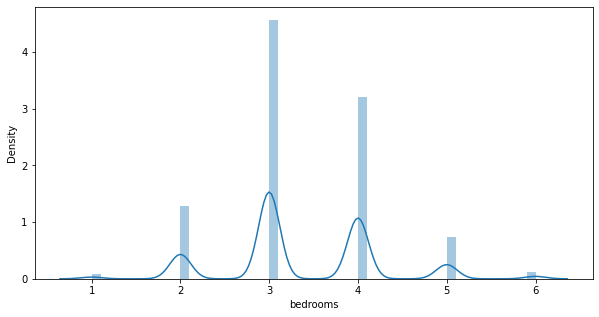

In [73]:
# This is how the graph of bedrooms looks like without any alterations
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot( a=bed["bedrooms"], hist=True)

In [121]:
# I cut off the graph up to 1,000,000 in order to use it later for a higher degree of linear regression. 
# The highest value in price is up to a little less than $8,000,000
p = df.loc[df_simple['price'] <= 1_500_000]
len(p)


21080

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


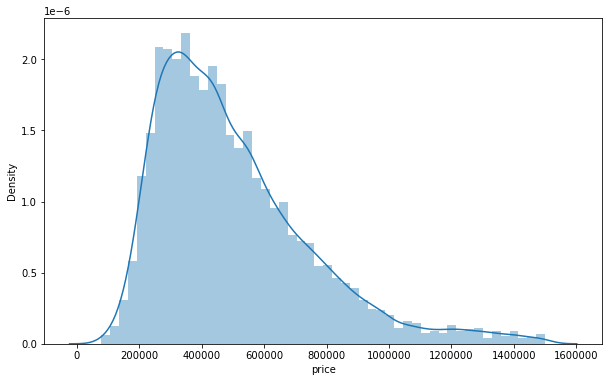

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot( a=p['price'], hist=True)

# this turns of scientific notation for numerical vals
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

In [123]:
bath = df.loc[df_simple['bathrooms'] <= 4]
len(bath)

21330

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

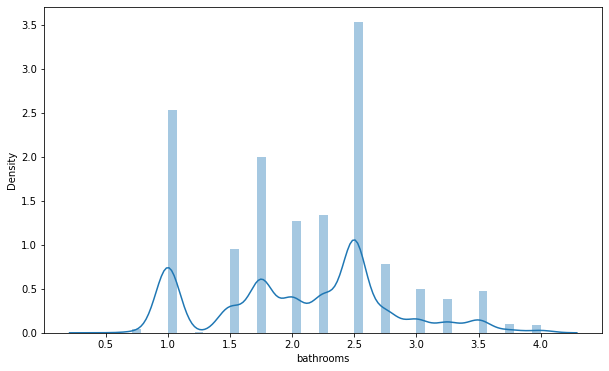

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot( a=bath["bathrooms"], hist=True)

In [125]:
s = df.loc[df_simple['sqft_living'] <= 4_000]
len(s)

20814

/Users/raulcassieltorresponce/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

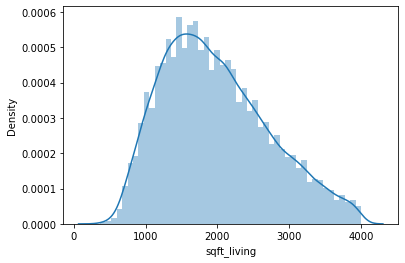

In [126]:
sns.distplot( a=s["sqft_living"], hist=True)

In [144]:
result_df = df.loc[df_simple['bedrooms'] <= 6]
len(result_df)

21535

In [145]:
result_df = df.loc[df_simple['price'] <= 1_000_000]
len(result_df)

20138

In [146]:
result_df = df.loc[df_simple['bathrooms'] <= 4]
len(result_df)

21330

In [147]:
result_df = df.loc[df_simple['sqft_living'] <= 6_000]
len(result_df)

21528

In [148]:
result_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
price,1.000000,0.310612,0.507185,0.679391,0.080384,0.261420,0.050907
bedrooms,0.310612,1.000000,0.521993,0.596883,0.026326,0.178886,0.159901
bathrooms,0.507185,0.521993,1.000000,0.745247,0.071644,0.505646,0.514307
sqft_living,0.679391,0.596883,0.745247,1.000000,0.156601,0.356305,0.326676
sqft_lot,0.080384,0.026326,0.071644,0.156601,1.000000,-0.009881,0.048977
floors,0.261420,0.178886,0.505646,0.356305,-0.009881,1.000000,0.490339
yr_built,0.050907,0.159901,0.514307,0.326676,0.048977,0.490339,1.000000


In [149]:
endog = result_df['price']
exog = sm.add_constant(result_df['sqft_living'])
simple_model = sm.OLS(endog=endog, exog=exog).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.845e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:48:23   Log-Likelihood:            -2.9789e+05
No. Observations:               21528   AIC:                         5.958e+05
Df Residuals:                   21526   BIC:                         5.958e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9456.8254   4338.217     -2.180      0.029    -1.8e+04    -953.599
sqft_living   263.0489      1.936    135.843      0.000     259.253     266.844
==============================================================================
Omnibus:                    11406.557   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156442.514
Skew:                           2.239   Prob(JB):                         0.00
Kurtosis:                      15.424   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y = df['price']
X = df_simple[the_big_3]


multi_model = sm.OLS(Y, sm.add_constant(X)).fit()
multi_model_summary = multi_model.summary()
multi_model_summary

In [140]:
# endog = df['price']
# exog = sm.add_constant(df['bathrooms'])
# simple_model = sm.OLS(endog=endog, exog=exog).fit()
# simple_model_summary = simple_model.summary()
# simple_model_summary

In [141]:
# df_simple.corr()

In [142]:
# endog = df['price']
# exog = sm.add_constant(df['sqft_living'])
# simple_model = sm.OLS(endog=endog, exog=exog).fit()
# simple_model_summary = simple_model.summary()
# simple_model_summary

In [381]:
the_big_3 = ['sqft_living', 'bathrooms', 'bedrooms']


In [420]:
Y = df['price']
X = df_simple[the_big_3]


multi_model = sm.OLS(Y, sm.add_constant(X)).fit()
multi_model_summary = multi_model.summary()
multi_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:28:12   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [418]:
X

,sqft_living,bathrooms,bedrooms
0,1180,1.00,3
1,2570,2.25,3
2,770,1.00,2
3,1960,3.00,4
4,1680,2.00,3
...,...,...,...
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2
21595,1600,2.50,3
